In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib

In [2]:
temp_img=cv2.imread("./test_images/virat3.jpg")

In [3]:
temp_img

array([[[115, 110, 101],
        [115, 110, 101],
        [114, 109, 100],
        ...,
        [133, 128, 119],
        [133, 128, 119],
        [133, 128, 119]],

       [[115, 110, 101],
        [115, 110, 101],
        [114, 109, 100],
        ...,
        [133, 128, 119],
        [133, 128, 119],
        [133, 128, 119]],

       [[115, 110, 101],
        [115, 110, 101],
        [114, 109, 100],
        ...,
        [133, 128, 119],
        [133, 128, 119],
        [133, 128, 119]],

       ...,

       [[ 17,  16,  26],
        [ 17,  16,  26],
        [ 17,  16,  26],
        ...,
        [ 62,  96, 166],
        [ 62,  96, 166],
        [ 62,  96, 166]],

       [[ 17,  16,  26],
        [ 17,  16,  26],
        [ 17,  16,  26],
        ...,
        [ 62,  96, 166],
        [ 62,  96, 166],
        [ 62,  96, 166]],

       [[ 17,  16,  26],
        [ 17,  16,  26],
        [ 17,  16,  26],
        ...,
        [ 62,  96, 166],
        [ 62,  96, 166],
        [ 62,  96, 166]]

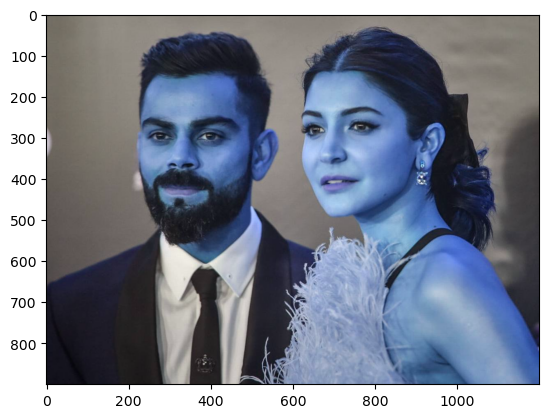

In [4]:
plt.imshow(temp_img)

In [5]:
temp_img.shape

(900, 1200, 3)

In [6]:
temp_img_grey=cv2.cvtColor(temp_img,cv2.COLOR_BGR2GRAY)
temp_img_grey.shape


(900, 1200)

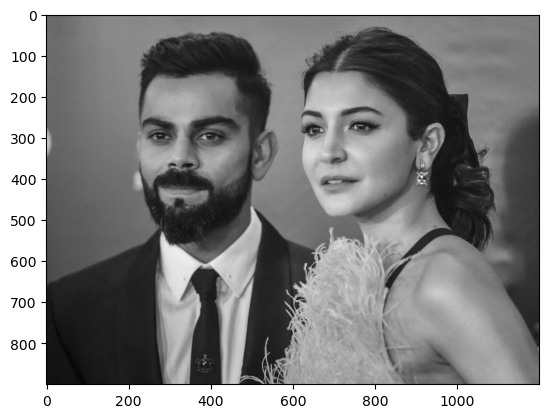

In [7]:
plt.imshow(temp_img_grey,cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [9]:
temp_face=face_cascade.detectMultiScale(temp_img_grey,1.3,5)

In [10]:
temp_face.shape

(3, 4)

In [11]:
for index in temp_face:
    print(index)

[151 145 372 372]
[524 126 364 364]
[402 638 116 116]


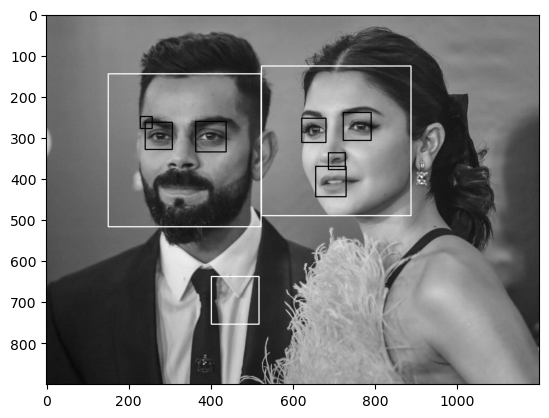

In [12]:
roi_box=[];
for index in temp_face:
    (x,y,w,h) = index
    temp_img_2=cv2.rectangle(temp_img_grey,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=temp_img_grey[y:y+h,x:x+w]
    roi_box.append(temp_img_2[y:y+h,x:x+w])
#     print(roi_box)
    temp_eye=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in temp_eye:
#         print(ex,ey,ew,eh)
        cv2.rectangle(roi_box[-1],(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
    plt.imshow(temp_img_2,cmap='gray')

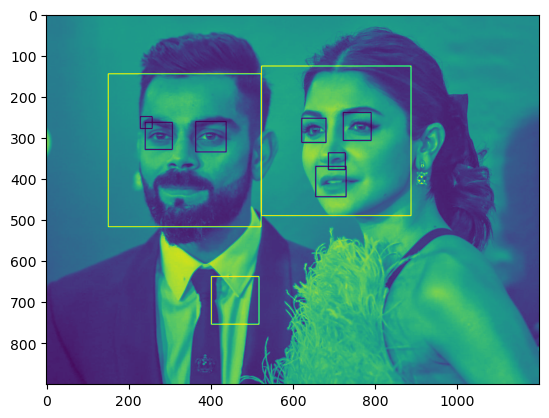

In [13]:
plt.imshow(temp_img_2)

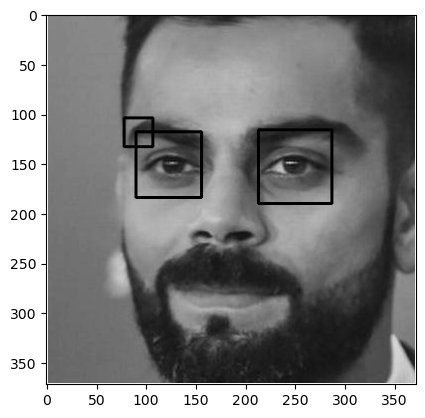

In [14]:
%matplotlib inline
plt.imshow(roi_box[0], cmap='gray')

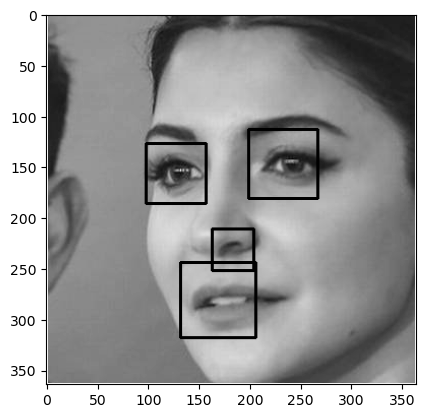

In [15]:
plt.imshow(roi_box[1], cmap='gray')

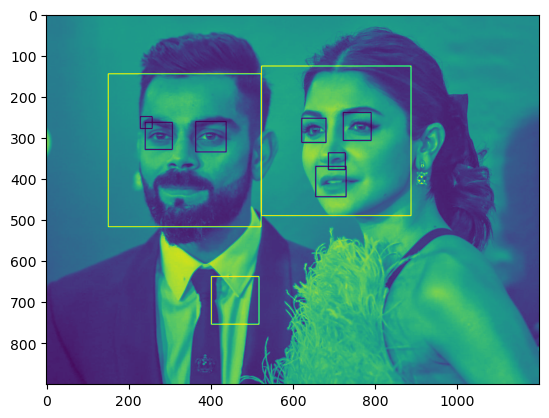

In [16]:
plt.imshow(temp_img_grey)

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    roi_color=[]
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        temp_roi_color =img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
#             print("here")
            roi_color.append(temp_roi_color)
    return roi_color

In [18]:
croped_img=get_cropped_image_if_2_eyes("./test_images/virat3.jpg")

In [19]:
len(croped_img)

2

In [20]:
type(croped_img)

list

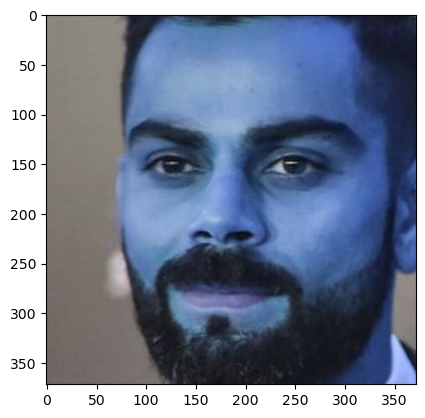

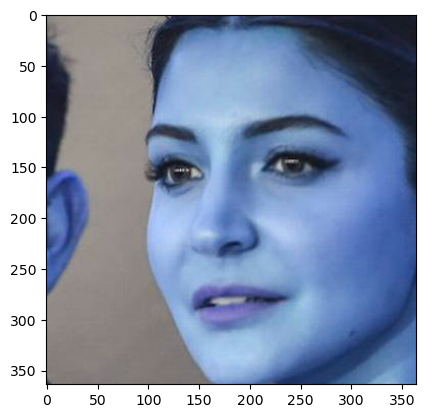

In [21]:
for index in croped_img:
    plt.imshow(index,cmap='gray')
    plt.show()

In [22]:
path_to_data='./images_dataset/'
path_to_cr_data='./images_dataset/cropped/'

In [23]:
import os
imgs_dir=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        imgs_dir.append(entry.path)
    

In [24]:
imgs_dir

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
person_file_name_dict={}
for img_dir in imgs_dir:
    person_name=img_dir.split('/')[-1]
    folder_name=path_to_cr_data+person_name
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)
    os.mkdir(folder_name)
    count=1
    person_file_name_dict[person_name]=[]
    print(person_name)
    for entry in os.scandir(img_dir):
#         print(entry)
        croped_img=get_cropped_image_if_2_eyes(entry.path)
        if croped_img is not None:
            for index in croped_img:
                croped_file_name=person_name+str(count)+'.png'
                croped_file_path=folder_name+'/'+croped_file_name
                cv2.imwrite(croped_file_path,index)
                person_file_name_dict[person_name].append(croped_file_path)
                count+=1

lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [27]:
file_name=imgs_dir[0].split('/')[-1]

In [28]:
file_name

'lionel_messi'

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

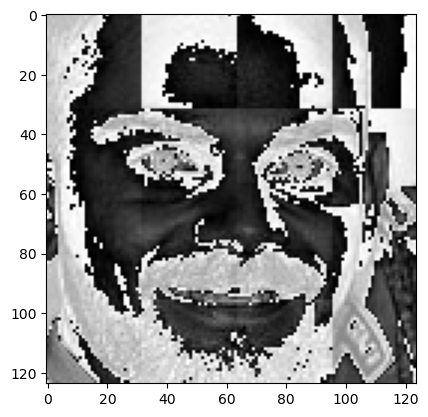

In [30]:
im_har = w2d(croped_img[0],'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
class_dict = {}
count = 0
for celebrity_name in person_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [32]:
X, y = [], []
for celebrity_name, training_files in person_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [33]:
X

[array([[100],
        [129],
        [140],
        ...,
        [237],
        [234],
        [232]], dtype=uint8),
 array([[ 90],
        [ 66],
        [ 67],
        ...,
        [ 36],
        [247],
        [ 23]], dtype=uint8),
 array([[42],
        [44],
        [51],
        ...,
        [ 4],
        [55],
        [ 5]], dtype=uint8),
 array([[ 63],
        [ 63],
        [ 67],
        ...,
        [  2],
        [194],
        [  4]], dtype=uint8),
 array([[194],
        [128],
        [126],
        ...,
        [ 30],
        [254],
        [253]], dtype=uint8),
 array([[ 56],
        [ 65],
        [ 68],
        ...,
        [231],
        [248],
        [ 15]], dtype=uint8),
 array([[29],
        [34],
        [33],
        ...,
        [ 3],
        [ 0],
        [ 0]], dtype=uint8),
 array([[126],
        [130],
        [125],
        ...,
        [247],
        [ 10],
        [232]], dtype=uint8),
 array([[  9],
        [ 16],
        [ 15],
        ...,
        [2

In [34]:
len(X)

221

In [35]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [36]:
X = np.array(X).reshape(len(X),4096).astype(float)

In [37]:
x

402